In [52]:
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy as np
import time
import math
import copy
import pdb

from DrawSolution import draw_all_pallets
from class_item import Item
import generate 
import pallet



In [53]:
def print_matrix(matrix):
    for i in range(len(matrix)):
        print(matrix[i])
        print('\n')

In [54]:
%run generate.py
%run DrawSolution.py


eps = 1
pallet_width = 70
pallet_height = 30
numPoligons = 25


# t = time.time()
g= generate.Generator(pallet_width, pallet_height, numPoligons )
g.start(eps)
items = g.data
pal = pallet.Pallet(0, pallet_width, pallet_height, eps)
itemsCopy = copy.deepcopy(items)

for item in itemsCopy:
    print(item.id)
    print_matrix(item.matrix)



0.000997304916381836 v
0
[0 1 1 1 1 1 1]


[1 1 1 1 1 1 1]


[1 1 1 1 1 1 1]


[1 1 1 1 1 1 1]


[1 1 1 1 1 1 0]


[0 1 1 1 0 0 0]


1
[0 0 0 0 1 1 0 0 0 0 0]


[0 0 0 0 1 1 0 0 0 0 0]


[0 0 0 0 1 1 0 0 0 0 0]


[0 0 0 1 1 1 1 0 0 0 0]


[0 0 0 1 1 1 1 0 0 0 0]


[0 0 0 1 1 1 1 0 0 0 0]


[0 0 1 1 1 1 1 1 0 0 0]


[0 0 1 1 1 1 1 1 0 0 0]


[0 0 1 1 1 1 1 1 0 0 0]


[0 0 1 1 1 1 1 1 1 0 0]


[0 1 1 1 1 1 1 1 1 0 0]


[0 1 1 1 1 1 1 1 1 0 0]


[0 1 1 1 1 1 1 1 1 0 0]


[0 1 1 1 1 1 1 1 1 0 0]


[1 1 1 1 1 1 1 1 1 0 0]


[1 1 1 1 1 1 1 1 1 0 0]


[1 1 1 1 1 1 1 1 1 1 0]


[1 1 1 1 1 1 1 1 1 1 0]


[1 1 1 1 1 1 1 1 1 1 0]


[1 1 1 1 1 1 1 1 1 1 0]


[1 1 1 1 1 1 1 1 1 1 0]


[0 1 1 1 1 1 1 1 1 1 0]


[0 1 1 1 1 1 1 1 1 1 0]


[0 0 1 1 1 1 1 1 1 1 1]


[0 0 1 1 1 1 1 1 1 1 1]


[0 0 1 1 1 1 1 1 1 1 1]


[0 0 0 1 1 1 1 1 1 1 1]


[0 0 0 1 1 1 1 1 1 1 1]


[0 0 0 0 1 1 1 1 1 1 1]


[0 0 0 0 1 1 1 1 1 1 0]


[0 0 0 0 0 1 1 1 1 1 0]


[0 0 0 0 0 1 1 1 1 1 0]


[0 0 0 0 0 0 1 1 1 0 0]


[0 0 0 

In [55]:
def check_position(a, b):

    check = True
    surf = 1
    if a == 0:

        check = True
        surf = 1
       
    else:

        if b > 0:

            check = False
            surf = a
            
        else:

            if b in range(0, -a, -1):
                check = False
                surf = a+b
                
            else:

                check = True
                surf = 1

    return check, surf

def check_item(pallet, itemMatrix):
    lb_x = -1
    lb_y = -1

    for i in range( len(pallet)):

        j = 0
        while j < len( pallet[0]):
 
            exit = False
            check = check_position(pallet[i][j],itemMatrix[0][0]  )

            # print(time.time() - t)
            if check[0]:

                if len(itemMatrix) + i <= len(pallet) and len(itemMatrix[0]) + j <= len(pallet[0]):

                    # располагаем объект
                    for p in range(len(itemMatrix)):

                        for k in range(len(itemMatrix[0])):

                            # решаем есть ли пересечение
                            if pallet[i+p][j+k] > 0:

                                if itemMatrix[p][k] > 0:
                                    
                                    exit = True
                                    break
                        if exit:
                            
                            break
                else:

                    exit = True

                # если пересечений нет и элемент влезает, то добавляем его
                if not exit:
                    
                    lb_x = i
                    lb_y = j    
                    break

            else:
                exit = True
                
            j+=check[1]
                
        if not exit:
           
            break

    
    return exit, lb_x, lb_y  


In [56]:
def fit_item(pallet, itemMatrix, i, j ):

    for p in range(len(itemMatrix)):

        k = 0
        while k < len(itemMatrix[0]):
            if  itemMatrix[p][k] > 0:
                pallet[i+p][j+k] += itemMatrix[p][k]
                k+=1
            else:
                k-= itemMatrix[p][k]
    return None


def fit_item_all_route(pallet, item):
    listMatrix = item.listMatrix 
    bounder_y = pallet.shape[1]
    bounder_x = pallet.shape[0]
    rout = 0
    exit = True
    # for r in range(4):  
    r = 0
    sol = check_item(pallet,  listMatrix[r])
    if sol[0] == False:
        if sol[1] + len(listMatrix[r]) <=  bounder_x:
            if sol[2] <  bounder_y:
                item.lb_x = sol[1]
                item.lb_y = sol[2]
                item.rotation = r * math.pi / 2
                exit = False
                bounder_x = sol[1]  + len(listMatrix[r])
                bounder_y = sol[2]  
                rout = r
        
    if not exit:
        fit_item(pallet, listMatrix[rout], item.lb_x, item.lb_y )

    return pallet, exit

In [57]:

def find_lb_coordinates(items, eps):
    for item in items:
        item.lb_x = item.lb_x * eps
        item.lb_y = item.lb_y * eps
        
    return items


# # для того что бы убрать поворот, замени метод fit_item_all_route  на fit_item
def fit_pallets(matrix_shape, items, eps):
    
    pallets = []
    pallets.append(np.zeros(matrix_shape, dtype = np.uint16))
    for item in items:
 
        i=0
        exit = True
        while exit and i<len(pallets):
            # print(pallets[i].rot90(), i )
           
            pallets[i], exit = fit_item_all_route(pallets[i], item)
            if exit and i==(len(pallets)-1):

                pallets.append(np.zeros(matrix_shape, dtype = np.uint16))
            if not exit:
                
                item.pallet_number = i
            i+=1

            # draw_all_pallets(understand_pallets(items), pallet_width, pallet_height)
     
    find_lb_coordinates(items, eps)

    return pallets
    



In [58]:
def understand_pallets(items):
    packing = []
    usedNumPallet = max([item.pallet_number for item in items])

    for i in range(usedNumPallet  + 1):
        # print(i)
        packing.append([])

    for i in range(usedNumPallet  + 1):
        for item in items:
            if item.pallet_number > len(packing):
                    packing.append([])
            if item.pallet_number == i:
                packing[i].append(item)
    


    return packing


In [59]:


def swap(list, pos1, pos2):

    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list


# перениси это item class
def clearCoordinat(item):
    item.lb_x = None
    item.lb_y = None
    item.rotation = 0.0
    item.pallet_number = None

    return None


#  алгоритм локального поиска
def locSearch(matrix_shape , poligons, eps):

    n = len( poligons)
    objVal = len(fit_pallets(matrix_shape,  poligons, eps))

    # print(poligons[0].lb_x)
    stop = False
    while not stop:
        # print([item.id for item in poligons])
        

        betterNeighboor = (0,0)
        stop = True
        for i in range(n):

            for j in range(i + 1, n):

                for poligon in poligons:
                    clearCoordinat(poligon)

            
                pal = fit_pallets(matrix_shape, swap(poligons, i, j), eps)
                swap(poligons, i, j)
                
                val = len(pal)
                # print('1', val, 'c', i, j)
                if val < objVal:
                    # print(i,j)
                    

                    stop = False
                    objVal = val
                    betterNeighboor = (i,j)
                    

            
        if betterNeighboor != (0,0):
            # print('1*1')
            fit_pallets(matrix_shape, swap(poligons, betterNeighboor[0], betterNeighboor[1]), eps)
            
    for poligon in poligons:
        clearCoordinat(poligon)
    fit_pallets(matrix_shape,  poligons, eps)

        # print([item.id for item in poligons])
        
                

    # for item in poligonsBest:
    #     print(item.lb_x, item.lb_y, item.rotation)
    draw_all_pallets(understand_pallets(poligons), pallet_width, pallet_height)

    return objVal

0.4617631435394287


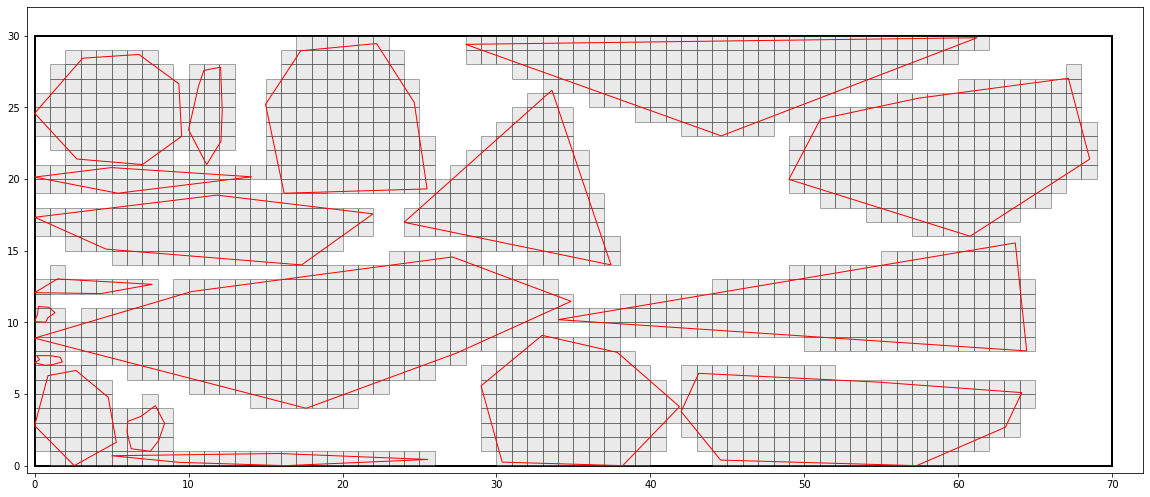

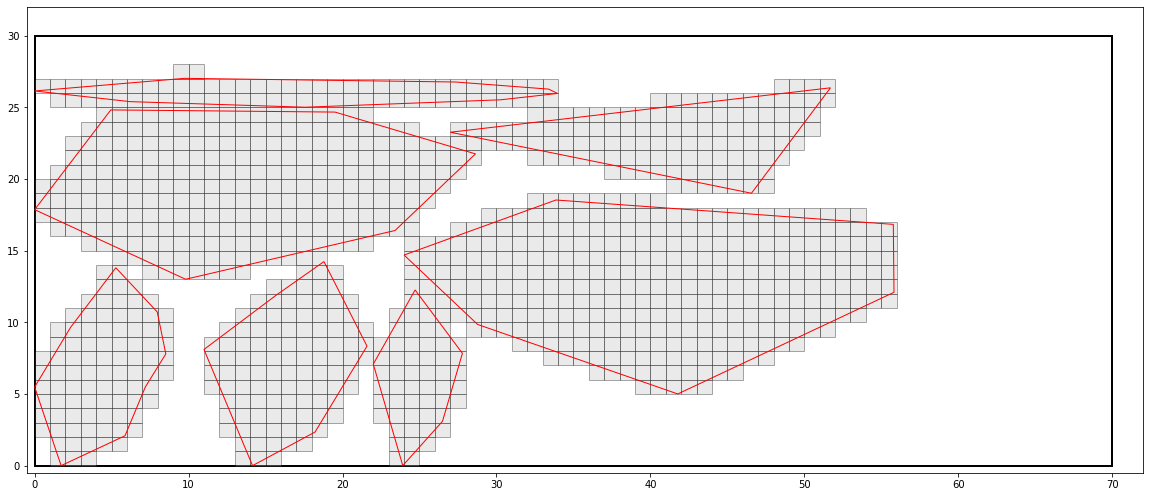

In [60]:

import FitPallets

# t = time.time()
# pal = pallet.Pallet(0, pallet_width, pallet_height, eps)
# print(time.time() - t)


items2 = copy.deepcopy(items)


t = time.time()
# l = np.zeros((pallet_width, pallet_height), dtype = np.uint16)
pal = fit_pallets(pal.shape, items2, eps )
# print(locSearch(pal.shape , items2, eps))
print(time.time() - t)
draw_all_pallets(understand_pallets(items2), pallet_width, pallet_height, eps)

# print([item.id for item in items2])

# print(len(items))
# for item in items:
#     print(item.id)
#     item.show_item()


In [61]:

# print_matrix(pal[0])
# print('\n')
# print_matrix(pal[1])

# for i in range(len(items2)):
#     print(items2[i].lb_x, items2[i].lb_y)
#     print(items2[i].rotation * 2 / math.pi)
#     print(items2[i].listMatrix[int(items2[i].rotation * 2 / math.pi)])
#     items2[i].show_item()
#     # print_matrix(np.rot90(items2[i].matrix, 3))